# **EEG-Based Motor Imagery Decoding with Deep Learning**

## **Abstract**
   This project develops neural networks to encode motor imagery from EEG data, predicting whether a patient is contemplating movements involving their right or left hand, both feet, or tongue. We implemented and compared three models which utilizing Neural Networks classes from the SpeechBrain.nnet library:


1.   CNNsModel: A modified version of EEGNet featuring three layers (2D Convolutional Neural Networks (CNN), 1D CNN, and a dense layer).
2.   LstmModel: An LSTM-based Recurrent Neural Network (RNN) model.
3. CNNsLstmModel: A combination of the first two models.

Each model's performance was evaluated post-training and after hyperparameter tuning. The results demonstrate that the standalone CNNs model achieved the highest accuracy in classifying motor imagery tasks. These findings suggest that CNN architectures may offer superior performance in applications involving EEG data and motor imagery classification.




## **Introduction**

In this project, the primary focus is on encoding EEG signals and accurately classifying them into four distinct categories to identify intended movements. Existing approaches, particularly those found in the 'SpeechBrain-MOABB' public library, commonly utilize Convolutional Neural Networks (CNNs) for pattern extraction from EEG signals, followed by a dense layer for classification. Notably, the EEGNet model [1] and ShallowConvNet [2] leverage CNNs to extract temporal features and features across channels, and a fully connected output layer for classfication output. The main difference is that EEGNet employs an additional 2D CNN compared to ShallowConvNet.

This project explores the efficacy of combining Recurrent Neural Networks (RNNs) with CNNs and compares these hybrid models to those using only RNNs or CNNs to determine the most effective neural network combination for EEG signal encoding. By integrating RNNs, specifically LSTM units, the model captures not only local patterns across both temporal and spatial dimensions but also long-term dependencies within the EEG data. This exploration aims to demonstrate whether a hybrid architecture can effectively address the challenges inherent in EEG classification tasks, such as complex temporal dynamics and subtle spatial patterns.

The dataset utilized in this study, BNCI2014001 [3], consists of EEG data from nine subjects, each undergoing two sessions, resulting in a total of 288 trials per session across four motor imagery tasks. The following sections will provide a detailed description of the models used, along with the main results achieved.

## **Methodology**
This study compares the performance of hidden layers across three models, each ended up in a dense output layer followed by a softmax activation to classify into four categories. The primary focus here is on the hidden layers responsible for feature extraction.

Initially, I implemented a simple RNN model utilizing LSTM units. This model processes raw input data directly, allowing the LSTM to learn relevant temporal features from EEG signals during training. This approach forgoes traditional preprocessing or explicit feature extraction, instead relying on the LSTM’s capacity to develop representations from raw data.

Subsequently, modifications were made to the existing EEGNet model from MOABB to better capture spatial characteristics unique to each EEG channel. The first layer was altered to a depthwise 2D convolutional layer, followed by a 1D convolutional layer designed to extract temporal features.

Finally, I integrated these approaches by inserting the LSTM layer from the first model between the depthwise 2D convolutional and 1D convolutional layers of the modified EEGNet. This LSTM layer aims to capture temporal dependencies over the time dimension of the EEG signals, enhancing the model's ability to process complex temporal dynamics.


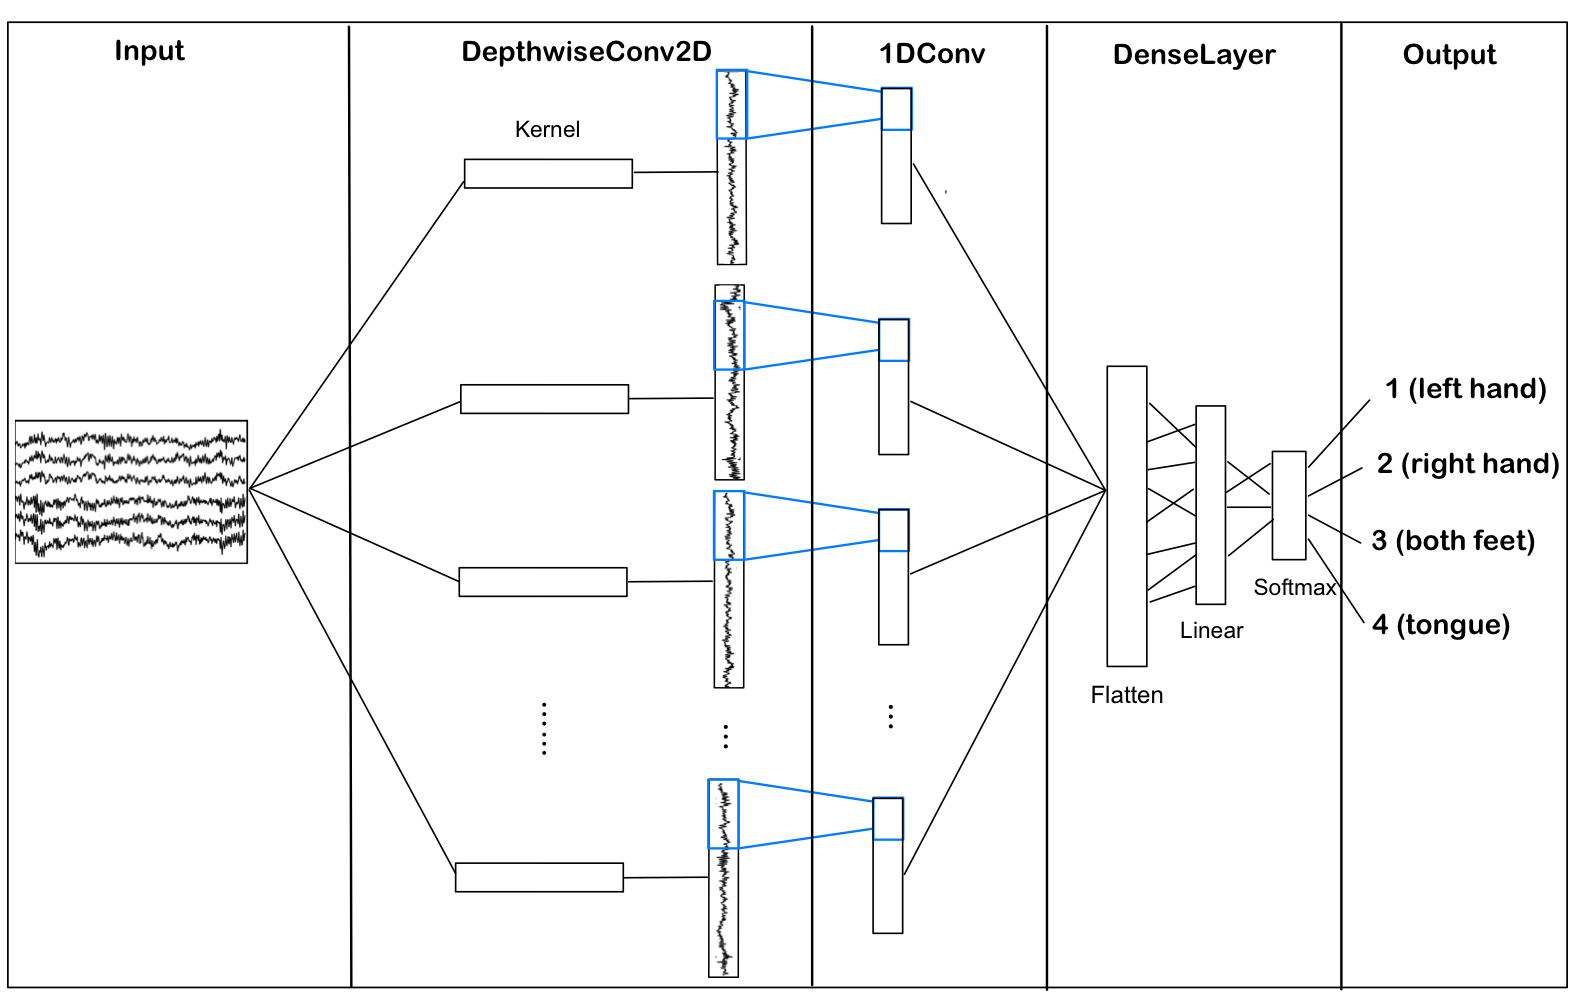

This diagram illustrates the best-performing model which is CNNcModel in this project. It shows the flow from input EEG signals through sequential layers—depthwise 2D convolution followed by 1D convolution—and ultimately to the dense output layer. The kernel size in the depthwise 2D convolution uses a filter of size (1, C), where C represents the number of EEG channels. The convolution is performed individually across each channel to capture the spatial characteristics unique to each EEG channel. Subsequently, the output from this 2D layer undergoes batch normalization and an activation function, and is then flattened before being fed into the next 1D convolutional layer. The 1D convolution primarily captures temporal dependencies and features from the flattened spatial features. This is followed by max pooling, and finally, the dense layer and softmax function to output the classes.

## **Experimental Setup**

This project utilizes the publicly available BNCI2014001 dataset, which comprises EEG data from 9 subjects. Each subject participated in two sessions, with each session consisting of six runs. Each run included 48 trials, distributed evenly across four motor imagery tasks: Imagining movement of the


*   Left hand (class 1)
*   Right hand (class 2)
*   Both feet (class 3)
*   Tongue (class 4)


The project employs several machine learning techniques to enhance the model’s performance and reliability:

Normalization Techniques:
*   Batch Normalization: Applied after each convolutional layer to help normalize the outputs, making the training less sensitive to the initial learning rates and weights' configuration.
*   Layer Normalization: Used after each recurrent layer to normalize the data across features, stabilizing the learning process.

Pooling:
*   Max Pooling: Implemented in the CNNsModel to reduce the time dimension by effectively downsampling the temporal resolution. This operation helps in extracting dominant features while reducing computational complexity and overfitting risk.

Regularization:
*   Dropout: Utilized specifically in the LSTM layers randomly ignore a subset of features during training. This helps prevent the model from relying too heavily on any individual neurons and promotes generalization.

Bidirectional LSTM:
*   Setting LSTM layers to be bidirectional enables the model to process data in both forward and backward directions, capturing a richer set of temporal dynamics. This approach often results in better performance by providing the network with additional context.





**Used ML Techniques and Corresponding Hyperparameters**

---


| ML techniques  | hyperparameters |
| --- | --- |
| batch normalization | momentum, affine |
| pooling | kernel_size, stride |
| dropout | dropout |


## **Experimental Results**

The results achieved in this study underscore the effectiveness of the CNNs model in decoding EEG signals for motor imagery tasks. These findings are compared with the performance of standalone LSTM and hybrid CNNsLSTM models to gauge their relative efficacies.


---

| Model | Leave-One-Subject-Out | Leave-One-Session-Out | Test Accuracy (subset tune) | Test Accuracy (Full Tune) |
|------------|-----|-----|-----|-----|
|CNNsModel | 0.394676  | 0.375193 | 0.605208 ± 0.005297   | 0.621489 ± 0.004627 |
|LstmModel | 0.261574   | 0.251736   | 0.258025 ± 0.003695  |
|CNNsLstmModel | 0.489776   | 0.468943   | 0.406038 ± 0.021107  |
|CNNsLiGRUModel | 0.348958 |  |  |

---


**Steps in Training Models**

Each model was trained using two distinct strategies: 'Leave-One-Session-Out' (training and testing on sessions from the same subject) and 'Leave-One-Subject-Out' (training and testing on sessions from different subjects). Hyperparameter tuning was subsequently performed under 'Leave-One-Session-Out' with a subset of four subjects and two sessions per subject. The accuracies listed are averages of aggregated results.

For the CNNsLstmModel, the RNN unit was switched from LSTM to LiGRU to test for performance improvements. However, this modification led to a significant drop in performance, indicating that the original LSTM configuration was more effective for this task.


**Impact of Training Strategy and Hyperparameter Tuning**

The CNNsModel, which performed best in preliminary tests, underwent hyperparameter tuning across the full dataset. This approach improved its accuracy to approximately 62%, the highest among all models tested. The CNNsModel showed a notable improvement in accuracy after hyperparameter tuning. In contrast, other models did not show much improvement after running hyperparameter tuning on a subset of the dataset. For the LstmModel, performance did not improve, possibly due to limited hyperparameters available for tuning. Compared to the CNNsLstmModel, the increase in hyperparameters means the model requires more data to tune effectively.

The analysis also reveals that using the 'Leave-One-Subject-Out' training strategy generally yields better performance, although it requires more training time than 'Leave-One-Session-Out'. With the 'Leave-One-Subject-Out' strategy, the models are able to learn brain signal features across different subjects, leading to better performance. Conversely, the 'Leave-One-Session-Out' strategy does not capture EEG signal patterns across different subjects as effectively, resulting in poorer performance.

**Comparison Between Models**

The standalone LSTM model exhibited subpar performance in this project, suggesting that a simple RNN-based model may not be sufficient for effectively encoding complex EEG signals, since it cannot capture spatial and temporal patterns simultaneously. However, when CNN layers were combined with LSTM layers, there was a significant improvement in performance. Despite these gains, this hybrid approach still did not achieve optimal results compared to the model that exclusively utilized CNN layers in the hidden layers. This suggests that CNNs may be more adept at capturing the spatial features required for accurately classifying EEG signals.

**Critical Analysis**

While the CNNs Model shows promising results, particularly after full dataset tuning, it is evident that the choice of training strategy and neural network architecture significantly impacts performance. The superior results of the 'Leave-One-Subject-Out' approach suggest that models benefit from a broader diversity in training data. However, the increased computational demand highlights the trade-off between accuracy and efficiency.



---

# Code for 3 Models:

**Download SpeechBrain-MOABB**

In [1]:
%%capture
!git clone https://github.com/speechbrain/benchmarks
%cd /content/benchmarks
!git checkout eeg

%cd /content/benchmarks/benchmarks/MOABB
!pip install -r extra-requirements.txt # Install additional dependencies

**Install SpeechBrain and SpeechBrain-MOABB requirements, and install SpeechBrain**

In [2]:
%%capture
# Clone SpeechBrain repository (development branch)
%cd /content/
!git clone https://github.com/speechbrain/speechbrain/
%cd /content/speechbrain/

# Install required dependencies
!pip install -r requirements.txt
!pip install -r extra-requirements.txt
# Install SpeechBrain in editable mode
!pip install -e .

!pip uninstall mne --y
!pip install mne==1.6.1

%cd /content/benchmarks/benchmarks/MOABB/

**NOTES:**

```
#To make my Models and the train file compatible, need to change the following:
#In file train.py at line 37, change to:
if hasattr(mod, "bias") and not isinstance(mod.bias,bool):

#Please delete : '--device cpu' in common is you are running in gpu

Three Models python file is in this shared google drive:
https://drive.google.com/drive/folders/1IdSRLVpEqsZz1qEmzNZmL0V4bHKSpP3t?usp=share_link

#Please upload three Models python files to:
/content/benchmarks/benchmarks/MOABB/models

```



# Model 1 - CNNsModel

---

Store Parameters and Hyperparameters

In [9]:
tuned_hyperparams = """
# DATASET HPARS
fmin: 0.17 # @orion_step1: --fmin~"uniform(0.1, 5, precision=2)"
fmax: 31.1 # @orion_step1: --fmax~"uniform(20.0, 50.0, precision=3)"

# TRAINING HPARS
number_of_epochs: 50 # @orion_step1: --number_of_epochs~"uniform(10, 60, discrete=True)"
lr: 0.005 # @orion_step1: --lr~"choices([0.01, 0.005, 0.001, 0.0005, 0.0001])"

# MODEL
cnn_spatial_kernels: 59 # @orion_step1: --cnn_spatial_kernels~"uniform(4, 64,discrete=True)"
cnn_1d_kernels: 22 # @orion_step1: --cnn_1d_kernels~"uniform(4, 30,discrete=True)"
cnn_1d_kernelsize: 13 # @orion_step1: --cnn_1d_kernelsize~"uniform(5, 40,discrete=True)"
cnn_1d_kernelstride : 2 # @orion_step1: --cnn_1d_kernelstride~"uniform(1, 10,discrete=True)"
cnn_1d_pool: 2 # @orion_step1: --cnn_1d_pool~"uniform(1, 8,discrete=True)"
"""

other_hyperparams = """
seed: 1234
__set_torchseed: !apply:torch.manual_seed [!ref <seed>]

# DIRECTORIES
data_folder: !PLACEHOLDER  #'/path/to/dataset'. The dataset will be automatically downloaded in this folder
cached_data_folder: !PLACEHOLDER #'path/to/pickled/dataset'
output_folder: !PLACEHOLDER #'path/to/results'

# DATASET HPARS
# Defining the MOABB dataset.
dataset: !new:moabb.datasets.BNCI2014001
save_prepared_dataset: True # set to True if you want to save the prepared dataset as a pkl file to load and use afterwards
data_iterator_name: 'leave-one-session-out'
target_subject_idx: 0
target_session_idx: 1
events_to_load: null # all events will be loaded
original_sample_rate: 250 # Original sampling rate provided by dataset authors
sample_rate: 125 # Target sampling rate (Hz)
# band-pass filtering cut-off frequencies
n_classes: 4
tmin: 0.
tmax: 4.0
# number of steps used when selecting adjacent channels from a seed channel (default at Cz)
n_steps_channel_selection: 3
T: !apply:math.ceil
    - !ref <sample_rate> * (<tmax> - <tmin>)
C: 22
test_with: 'last' # 'last' or 'best'
test_key: "acc" # Possible opts: "loss", "f1", "auc", "acc"

# METRICS
f1: !name:sklearn.metrics.f1_score
    average: 'macro'
acc: !name:sklearn.metrics.balanced_accuracy_score
cm: !name:sklearn.metrics.confusion_matrix
metrics:
    f1: !ref <f1>
    acc: !ref <acc>
    cm: !ref <cm>

# TRAINING HPARS
n_train_examples: 100  # it will be replaced in the train script
# checkpoints to average
avg_models: 10
# Learning rate scheduling (cyclic learning rate is used here)
max_lr: !ref <lr> # Upper bound of the cycle (max value of the lr)
base_lr: 0.00000001 # Lower bound in the cycle (min value of the lr)
step_size_multiplier: 5 #from 2 to 8
step_size: !apply:round
    - !ref <step_size_multiplier> * <n_train_examples> / <batch_size>
lr_annealing: !new:speechbrain.nnet.schedulers.CyclicLRScheduler
    base_lr: !ref <base_lr>
    max_lr: !ref <max_lr>
    step_size: !ref <step_size>
label_smoothing: 0.0
loss: !name:speechbrain.nnet.losses.nll_loss
    label_smoothing: !ref <label_smoothing>
optimizer: !name:torch.optim.Adam
    lr: !ref <lr>
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter  # epoch counter
    limit: !ref <number_of_epochs>
batch_size: 32
valid_ratio: 0.2

# DATA NORMALIZATION
dims_to_normalize: 1 # 1 (time) or 2 (EEG channels)
normalize: !name:speechbrain.processing.signal_processing.mean_std_norm
    dims: !ref <dims_to_normalize>

# MODEL
input_shape: [1, !ref <T>, !ref <C>, 1]
dense_max_norm: 0.25

model: !new:models.CNNsModel.CNNsModel
    input_shape: !ref <input_shape>
    cnn_spatial_kernels: !ref <cnn_spatial_kernels>
    cnn_1d_kernels: !ref <cnn_1d_kernels>
    cnn_1d_kernelsize: !ref <cnn_1d_kernelsize>
    cnn_1d_kernelstride: !ref <cnn_1d_kernelstride>
    cnn_1d_pool: !ref <cnn_1d_pool>
    dense_max_norm: !ref <dense_max_norm>
"""

CNNs_hyperparams = tuned_hyperparams + other_hyperparams

f = open('/content/CNNs_hyperparams_hyperparams.yaml', "w")
f.write(CNNs_hyperparams)
f.close()

Train the Model with full datasets:

In [ ]:
!./run_experiments.sh --hparams /content/CNNs_hyperparams_hyperparams.yaml \
--data_folder '/content/data/BNCI2014001'\
--cached_data_folder '/content/data' \
--output_folder '/content/results/full-experiment-onCNNc/BNCI2014001' \
--nsbj 9 --nsess 2 --nruns 1 --train_mode 'leave-one-session-out' --device cpu



```
---- leave-one-session-out ----
0train acc 0.3758 ± 0.0525
1test acc 0.3746 ± 0.0697

Aggregated results
acc 0.37519290123456783 +- 0.0005787037037036924
Final Results (Performance Aggregation)


---- leave-one-session-out ----

0train acc [0.375800] avg: 0.375800 ± 0.000000
1test acc [0.374600] avg: 0.374600 ± 0.000000


Aggregated results

acc [0.375193] avg: 0.375193 ± 0.000000
[{'name': 'objective', 'type': 'objective', 'value': 0.6248070987654322}]
```



Run Hyperparameter Tuning on subset of datasets

In [ ]:
!./run_hparam_optimization.sh --hparams /content/CNNs_hyperparams_hyperparams.yaml \
--data_folder '/content/data/BNCI2014001'\
--output_folder '/content/results/hyperparameter-search-CNNsModel/BNCI2014001' \
--nsbj 9 --nsess 2 --nruns 1 --train_mode 'leave-one-session-out' \
--exp_name 'hyperparameter-search-CNNsModel' \
--nsbj_hpsearch 4 --nsess_hpsearch 2 \
--nruns_eval 10 \
--eval_metric acc \
--exp_max_trials 20 \
--device cpu



```
---- leave-one-session-out ----
0train acc 0.6127 ± 0.0944
1test acc 0.5849 ± 0.1156

Aggregated results
acc 0.5987654320987654 +- 0.01388888888888884
Final Results (Performance Aggregation)


---- leave-one-session-out ----

0train acc [0.626900 0.605300 0.619600 0.613000 0.612700 0.614200 0.612700 0.610300 0.610300 0.613000] avg: 0.613800 ± 0.005530
1test acc [0.607600 0.589500 0.597600 0.590700 0.584900 0.599200 0.601900 0.596500 0.600700 0.597600] avg: 0.596620 ± 0.006299


Aggregated results

acc [0.617284 0.597415 0.608603 0.601852 0.598765 0.606674 0.607253 0.603395 0.605517 0.605324] avg: 0.605208 ± 0.005297
[{'name': 'objective', 'type': 'objective', 'value': 0.39479166666666665}]
The test performance with best hparams is available at  /content/results/hyperparameter-search-CNNsModel/BNCI2014001/best
```



# Model 2 - LstmModel

---


Store Parameters and Hyperparameters

In [12]:
tuned_hyperparams_model2 = """
# DATASET HPARS
fmin: 1 # @orion_step1: --fmin~"uniform(0.1, 5, precision=2)"
fmax: 40 # @orion_step1: --fmax~"uniform(20.0, 50.0, precision=3)"

# TRAINING HPARS
number_of_epochs: 15 # @orion_step1: --number_of_epochs~"uniform(10, 60, discrete=True)"
lr: 0.0001 # @orion_step1: --lr~"choices([0.01, 0.005, 0.001, 0.0005, 0.0001])"
dropout: 0.15 # @orion_step1: --dropout~"uniform(0.0, 0.5)"

# MODEL
rnn_layers: 4 # @orion_step1: --rnn_layers~"uniform(4, 10,discrete=True)"
rnn_neurons: 100 # @orion_step1: --rnn_neurons~"uniform(4, 150,discrete=True)"
"""

other_hyperparams_model2 = """
seed: 1236
__set_torchseed: !apply:torch.manual_seed [!ref <seed>]

# DIRECTORIES
data_folder: !PLACEHOLDER  #'/path/to/dataset'. The dataset will be automatically downloaded in this folder
cached_data_folder: !PLACEHOLDER #'path/to/pickled/dataset'
output_folder: !PLACEHOLDER #'path/to/results'

# DATASET HPARS
# Defining the MOABB dataset.
dataset: !new:moabb.datasets.BNCI2014001
save_prepared_dataset: True # set to True if you want to save the prepared dataset as a pkl file to load and use afterwards
data_iterator_name: 'leave-one-session-out'
target_subject_idx: 0
target_session_idx: 1
events_to_load: null # all events will be loaded
original_sample_rate: 250 # Original sampling rate provided by dataset authors
sample_rate: 125 # Target sampling rate (Hz)
# band-pass filtering cut-off frequencies
n_classes: 4
tmin: 0.
tmax: 4.0
# number of steps used when selecting adjacent channels from a seed channel (default at Cz)
n_steps_channel_selection: 3
T: !apply:math.ceil
    - !ref <sample_rate> * (<tmax> - <tmin>)
C: 22
test_with: 'last' # 'last' or 'best'
test_key: "acc" # Possible opts: "loss", "f1", "auc", "acc"

# METRICS
f1: !name:sklearn.metrics.f1_score
    average: 'macro'
acc: !name:sklearn.metrics.balanced_accuracy_score
cm: !name:sklearn.metrics.confusion_matrix
metrics:
    f1: !ref <f1>
    acc: !ref <acc>
    cm: !ref <cm>

# TRAINING HPARS
n_train_examples: 100  # it will be replaced in the train script
# checkpoints to average
avg_models: 10
# Learning rate scheduling (cyclic learning rate is used here)
max_lr: !ref <lr> # Upper bound of the cycle (max value of the lr)
base_lr: 0.00000001 # Lower bound in the cycle (min value of the lr)
step_size_multiplier: 5 #from 2 to 8
step_size: !apply:round
    - !ref <step_size_multiplier> * <n_train_examples> / <batch_size>
lr_annealing: !new:speechbrain.nnet.schedulers.CyclicLRScheduler
    base_lr: !ref <base_lr>
    max_lr: !ref <max_lr>
    step_size: !ref <step_size>
label_smoothing: 0.0
loss: !name:speechbrain.nnet.losses.nll_loss
    label_smoothing: !ref <label_smoothing>
optimizer: !name:torch.optim.Adam
    lr: !ref <lr>
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter  # epoch counter
    limit: !ref <number_of_epochs>
batch_size: 32
valid_ratio: 0.2

# DATA NORMALIZATION
dims_to_normalize: 1 # 1 (time) or 2 (EEG channels)
normalize: !name:speechbrain.processing.signal_processing.mean_std_norm
    dims: !ref <dims_to_normalize>

# MODEL
input_shape: [1, !ref <T>, !ref <C>,1]
dense_max_norm: 0.25
dense_hidden_size: 4

model: !new:models.lstmModel.lstmModel
    input_shape: !ref <input_shape>
    rnn_neurons: !ref <rnn_neurons>
    rnn_layers: !ref <rnn_layers>
    dropout: !ref <dropout>
    dense_hidden_size: !ref <dense_hidden_size>
    dense_max_norm: !ref <dense_max_norm>
"""

lstmModel_hyperparams = tuned_hyperparams_model2 + other_hyperparams_model2

f = open('/content/lstmModel_hyperparams.yaml', "w")
f.write(lstmModel_hyperparams)
f.close()

Train the Model with full datasets:

In [ ]:
!./run_experiments.sh --hparams /content/lstmModel_hyperparams.yaml \
--data_folder '/content/data/BNCI2014001'\
--cached_data_folder '/content/data' \
--output_folder '/content/results/full-experiment-onLstm/BNCI2014001' \
--nsbj 9 --nsess 2 --nruns 1 --train_mode 'leave-one-session-out' \
--device cpu



```
---- leave-one-session-out ----
0train acc 0.2539 ± 0.0246
1test acc 0.2496 ± 0.028

Aggregated results
acc 0.2517361111111111 +- 0.0021219135802468952
Final Results (Performance Aggregation)


---- leave-one-session-out ----

0train acc [0.253900] avg: 0.253900 ± 0.000000
1test acc [0.249600] avg: 0.249600 ± 0.000000


Aggregated results

acc [0.251736] avg: 0.251736 ± 0.000000
[{'name': 'objective', 'type': 'objective', 'value': 0.7482638888888888}]
```



Run Hyperparameter Tuning on subset of datasets

In [ ]:
!./run_hparam_optimization.sh --hparams /content/lstmModel_hyperparams.yaml \
--data_folder '/content/data/BNCI2014001'\
--output_folder '/content/results/hyperparameter-search-lstmModel/BNCI2014001' \
--nsbj 9 --nsess 2 --nruns 1 --train_mode 'leave-one-session-out' \
--exp_name 'hyperparameter-search-lstmModel' \
--nsbj_hpsearch 4 --nsess_hpsearch 2 \
--nruns_eval 10 \
--eval_metric acc \
--exp_max_trials 20 \
--device cpu



```
---- leave-one-session-out ----
0train acc 0.2465 ± 0.0334
1test acc 0.2654 ± 0.0288

Aggregated results
acc 0.2559799382716049 +- 0.00945216049382716
Final Results (Performance Aggregation)


---- leave-one-session-out ----

0train acc [0.258100 0.252300 0.252300 0.268100 0.246500 0.258100 0.258900 0.256900 0.253900 0.250800] avg: 0.255590 ± 0.005584
1test acc [0.262700 0.256600 0.254600 0.262000 0.265400 0.250400 0.263500 0.262300 0.267700 0.259300] avg: 0.260450 ± 0.004986


Aggregated results

acc [0.260417 0.254437 0.253472 0.265046 0.255980 0.254244 0.261188 0.259645 0.260802 0.255015] avg: 0.258025 ± 0.003695
[{'name': 'objective', 'type': 'objective', 'value': 0.7419753086419754}]
The test performance with best hparams is available at  /content/results/hyperparameter-search-lstmModel/BNCI2014001/best
```



# Model 3 - CNNsLstmModel

---


Store Parameters and Hyperparameters

In [12]:
tuned_hyperparams_model3 = """
# DATASET HPARS
fmin: 0.17 # @orion_step1: --fmin~"uniform(0.1, 5, precision=2)"
fmax: 31.1 # @orion_step1: --fmax~"uniform(20.0, 50.0, precision=3)"

# TRAINING HPARS
number_of_epochs: 54 # @orion_step1: --number_of_epochs~"uniform(30, 60, discrete=True)"
lr: 0.0005 # @orion_step1: --lr~"choices([0.01, 0.005, 0.001, 0.0005, 0.0001])"
dropout: 0.4525 # @orion_step1: --dropout~"uniform(0.0, 0.5)"

# MODEL
cnn_dw_kernelsize: 17 # @orion_step1: --cnn_dw_kernelsize~"uniform(4, 30,discrete=True)"
rnn_neurons: 63 # @orion_step1: --rnn_neurons~"uniform(4, 70,discrete=True)"
rnn_layers: 9 # @orion_step1: --rnn_layers~"uniform(4, 20,discrete=True)"
cnn_1d_out: 7 # @orion_step1: --cnn_1d_out~"uniform(4, 20,discrete=True)"
cnn_1d_kernelsize: 30 # @orion_step1: --cnn_1d_kernelsize~"uniform(5, 40,discrete=True)"
cnn_1d_kernelstride : 4 # @orion_step1: --cnn_1d_kernelstride~"uniform(1, 10,discrete=True)"
pool: 6 # @orion_step1: --pool~"uniform(1, 8,discrete=True)"
"""

other_hyperparams_model3 = """
seed: 1236
__set_torchseed: !apply:torch.manual_seed [!ref <seed>]

# DIRECTORIES
data_folder: !PLACEHOLDER  #'/path/to/dataset'. The dataset will be automatically downloaded in this folder
cached_data_folder: !PLACEHOLDER #'path/to/pickled/dataset'
output_folder: !PLACEHOLDER #'path/to/results'

# DATASET HPARS
# Defining the MOABB dataset.
dataset: !new:moabb.datasets.BNCI2014001
save_prepared_dataset: True # set to True if you want to save the prepared dataset as a pkl file to load and use afterwards
data_iterator_name: 'leave-one-session-out'
target_subject_idx: 0
target_session_idx: 1
events_to_load: null # all events will be loaded
original_sample_rate: 250 # Original sampling rate provided by dataset authors
sample_rate: 125 # Target sampling rate (Hz)
# band-pass filtering cut-off frequencies
n_classes: 4
tmin: 0.
tmax: 4.0
# number of steps used when selecting adjacent channels from a seed channel (default at Cz)
n_steps_channel_selection: 3
T: !apply:math.ceil
    - !ref <sample_rate> * (<tmax> - <tmin>)
C: 22
test_with: 'last' # 'last' or 'best'
test_key: "acc" # Possible opts: "loss", "f1", "auc", "acc"

# METRICS
f1: !name:sklearn.metrics.f1_score
    average: 'macro'
acc: !name:sklearn.metrics.balanced_accuracy_score
cm: !name:sklearn.metrics.confusion_matrix
metrics:
    f1: !ref <f1>
    acc: !ref <acc>
    cm: !ref <cm>

# TRAINING HPARS
n_train_examples: 100  # it will be replaced in the train script
# checkpoints to average
avg_models: 10
# Learning rate scheduling (cyclic learning rate is used here)
max_lr: !ref <lr> # Upper bound of the cycle (max value of the lr)
base_lr: 0.00000001 # Lower bound in the cycle (min value of the lr)
step_size_multiplier: 5 #from 2 to 8
step_size: !apply:round
    - !ref <step_size_multiplier> * <n_train_examples> / <batch_size>
lr_annealing: !new:speechbrain.nnet.schedulers.CyclicLRScheduler
    base_lr: !ref <base_lr>
    max_lr: !ref <max_lr>
    step_size: !ref <step_size>
label_smoothing: 0.0
loss: !name:speechbrain.nnet.losses.nll_loss
    label_smoothing: !ref <label_smoothing>
optimizer: !name:torch.optim.Adam
    lr: !ref <lr>
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter  # epoch counter
    limit: !ref <number_of_epochs>
batch_size: 32
valid_ratio: 0.2

# DATA NORMALIZATION
dims_to_normalize: 1 # 1 (time) or 2 (EEG channels)
normalize: !name:speechbrain.processing.signal_processing.mean_std_norm
    dims: !ref <dims_to_normalize>

# MODEL
input_shape: [1, !ref <T>, !ref <C>,1]
cnn_dw_out: 20
dense_hidden_size: 4
dense_max_norm: 0.25

model: !new:models.CNNsLstmModel.CNNsLstmModel
    input_shape: !ref <input_shape>
    cnn_dw_out: !ref <cnn_dw_out>
    cnn_dw_kernelsize: !ref <cnn_dw_kernelsize>
    rnn_neurons: !ref <rnn_neurons>
    rnn_layers: !ref <rnn_layers>
    dropout: !ref <dropout>
    cnn_1d_out: !ref <cnn_1d_out>
    cnn_1d_kernelsize: !ref <cnn_1d_kernelsize>
    cnn_1d_kernelstride: !ref <cnn_1d_kernelstride>
    pool: !ref <pool>
    dense_hidden_size: !ref <dense_hidden_size>
    dense_max_norm: !ref <dense_max_norm>
"""

CNNsLstmModel_hyperparams = tuned_hyperparams_model3 + other_hyperparams_model3

f = open('/content/CNNsLstmModel_hyperparams.yaml', "w")
f.write(CNNsLstmModel_hyperparams)
f.close()

Train the Model with full datasets:

In [ ]:
!./run_experiments.sh --hparams /content/CNNsLstmModel_hyperparams.yaml \
--data_folder '/content/data/BNCI2014001'\
--cached_data_folder '/content/data' \
--output_folder '/content/results/full-experiment/BNCI2014001' \
--nsbj 9 --nsess 2 --nruns 1 --train_mode 'leave-one-session-out' \
 --device cpu



```
---- leave-one-subject-out ----
acc 0.4898 ± 0.0759

Aggregated results
acc 0.4897762345679012 +- 0.0
Final Results (Performance Aggregation)


---- leave-one-subject-out ----

acc [0.489800] avg: 0.489800 ± 0.000000


Aggregated results

acc [0.489776] avg: 0.489776 ± 0.000000
[{'name': 'objective', 'type': 'objective', 'value': 0.5102237654320988}]
```



Run Hyperparameter Tuning on subset of datasets

In [ ]:
!./run_hparam_optimization.sh --hparams /content/CNNsLstmModel_hyperparams.yaml \
--data_folder '/content/data/BNCI2014001'\
--output_folder '/content/results/hyperparameter-search-CNNsLstm/BNCI2014001' \
--nsbj 9 --nsess 2 --nruns 1 --train_mode 'leave-one-session-out' \
--exp_name 'hyperparameter-search-CNNsLstm' \
--nsbj_hpsearch 4 --nsess_hpsearch 2 \
--nruns_eval 10 \
--eval_metric acc \
--exp_max_trials 20 \
 --device cpu



```
---- leave-one-session-out ----
0train acc 0.4082 ± 0.1336
1test acc 0.4317 ± 0.1478

Aggregated results
acc 0.419945987654321 +- 0.011766975308642014
Final Results (Performance Aggregation)


---- leave-one-session-out ----

0train acc [0.351900 0.409700 0.425900 0.398900 0.408200 0.349500 0.374600 0.417800 0.427100 0.399300] avg: 0.396290 ± 0.026938
1test acc [0.388900 0.449100 0.422500 0.414000 0.431700 0.376500 0.432100 0.406600 0.412400 0.424000] avg: 0.415780 ± 0.020266


Aggregated results

acc [0.370370 0.429398 0.424190 0.406443 0.419946 0.363040 0.403356 0.412230 0.419753 0.411651] avg: 0.406038 ± 0.021107
[{'name': 'objective', 'type': 'objective', 'value': 0.5939621913580246}]
The test performance with best hparams is available at  /content/results/hyperparameter-search-CNNsLstm/BNCI2014001/best
```





---


# **Conclusions**

This study has demonstrated that models incorporating CNNs perform adequately with EEG signals, specifically with the dataset used in this project. The outcomes were different from my initial expectations. Initially, I believed that adding an RNN layer might enhance performance. However, the experiments did not conclusively show that RNNs are ineffective for encoding EEG signals; rather, they suggest that the suitability of RNNs may depend on the use of different models, techniques, or parameters, which could yield varied results. Future studies should explore a broader range of models and parameters to fully assess the capabilities of RNNs in EEG signal processing.



## **References**
[1] V. J. Lawhern et al., "EEGNet: A Compact Convolutional Network for EEG-based Brain-Computer Interfaces," Human Research and Engineering Directorate, U.S. Army Research Laboratory, Aberdeen Proving Ground, MD, May 17, 2018.

[2] R. T. Schirrmeister et al., "Deep learning with convolutional neural networks for brain mapping and decoding of movement-related information from the human EEG," Convolutional neural networks in EEG analysis, Intracranial EEG and Brain Imaging lab, Epilepsy Center, Medical Center – University of Freiburg, BrainLinks-BrainTools Cluster of Excellence, University of Freiburg, 2017.

[3] Tangermann, M., Müller, K.R., Aertsen, A., Birbaumer, N., Braun, C., Brunner, C., Leeb, R., Mehring, C., Miller, K.J., Mueller-Putz, G. and Nolte, G., 2012. Review of the BCI competition IV. Frontiers in neuroscience, 6, p.55.